In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


## 讀入資料

In [2]:
data = pd.read_csv("C:/Users/USER/Desktop/UCI_Credit_Card.csv (1)/UCI_Credit_Card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 個人習慣,將性別女性改為0

In [3]:
#將女性的類別取代為0
data["SEX"] = data["SEX"].replace(2,0)

## 將default.payment.next.month改為default

In [4]:
data.rename(columns={data.columns[24]:"default"},inplace=True)

In [5]:
data.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default'], dtype=object)

# 資料觀察

## 觀察一下default的情況

違約比例 :  0.2212


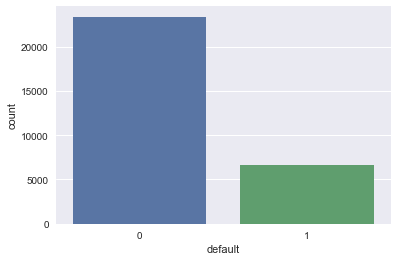

In [6]:
sns.set(style="darkgrid")
sns.countplot(data["default"])
undefault = data.groupby(by = "default").size()[0]
default = data.groupby(by = "default").size()[1]
default = default/(default+undefault)
print("違約比例 : ",default)

### 資料集為不平衡資料集,結果為1的比例僅有0.2212

## 定義一個函數來觀察參數之間的關係

In [7]:
def group_per (data,col1,col2) :
    df = data.groupby(by = [col1,col2]).size().unstack(1)
    df["Sum"] = df[df.columns[0]] + df[df.columns[1]]
    df["Per"] = df[df.columns[1]]/(df[df.columns[0]]+df[df.columns[1]]) 
    df.sort_values(by="Per")
    return df

## 性別之於default的關係

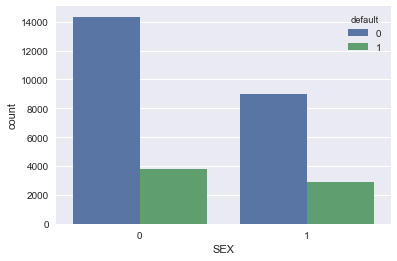

In [8]:
sns.countplot(data["SEX"],hue = data["default"])


In [9]:
group_per(data,"SEX","default")

default,0,1,Sum,Per
SEX,,,,
0,14349,3763,18112,0.207763
1,9015,2873,11888,0.241672


## 發現 :
* 男性的default比例為0.2416
* 女性的default比例為0.2077
* 男性的default稍高

# 觀察婚姻狀況對於default的影響

In [10]:
data["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

### 將遺漏值0併入3未知

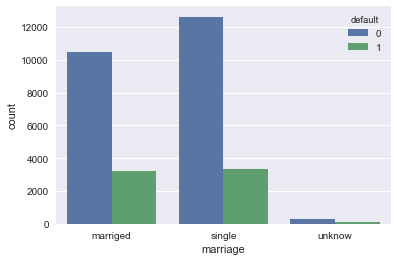

In [11]:
data["MARRIAGE"]=data["MARRIAGE"].replace(0,3)
data["marriage"] = data["MARRIAGE"].replace([1,2,3],["marriged","single","unknow"])
sns.countplot(data["marriage"],hue=data["default"])

In [12]:
marriage = group_per(data,"marriage","default")


## 發現:
* 已婚的違約率略高於單身
* unknow的違約率也頗高,但目前還不知道代表的族群 也許是離婚?

## 對教育程度做一些觀察

### 將未知意義的5,6,0併入4(OTHER)

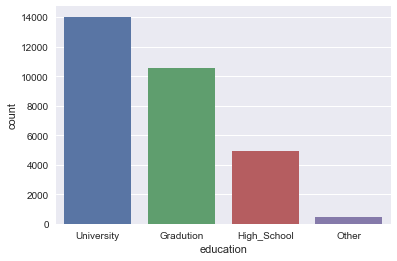

In [13]:
data["EDUCATION"] = data["EDUCATION"].replace([5,6,0],[4,4,4])
data["education"] = data["EDUCATION"].replace([1,2,3,4],["Gradution","University","High_School","Other"])
sns.countplot(data["education"])
sns.set(style="darkgrid")

In [14]:
education = group_per(data,"education","default")
education.sort_values(by = "Per")

default,0,1,Sum,Per
education,,,,
Other,435,33,468,0.070513
Gradution,8549,2036,10585,0.192348
University,10700,3330,14030,0.237349
High_School,3680,1237,4917,0.251576


## 發現 :
* 所有借款人中大學生較多
* 高中學歷借款defult的機率最高 達0.25
* 次之的是大學生達0.23

## 對年齡做一些觀察

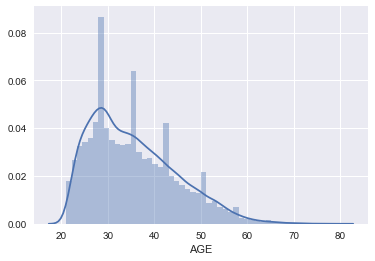

In [15]:
sns.distplot(data["AGE"],kde=True)

## 將年齡做區間化以利看出各區間的defult機率差別


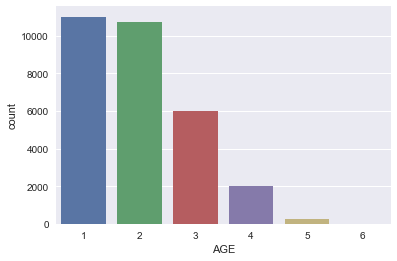

In [16]:
data.loc[(21<=data["AGE"])&(30>=data["AGE"]),"AGE"]=1
data.loc[(31<=data["AGE"])&(40>=data["AGE"]),"AGE"]=2
data.loc[(41<=data["AGE"])&(50>=data["AGE"]),"AGE"]=3
data.loc[(51<=data["AGE"])&(60>=data["AGE"]),"AGE"]=4
data.loc[(61<=data["AGE"])&(70>=data["AGE"]),"AGE"]=5
data.loc[(71<=data["AGE"])&(80>=data["AGE"]),"AGE"]=6

sns.countplot(data["AGE"])

In [17]:
data["AGE"].value_counts()

1    11013
2    10713
3     6005
4     1997
5      257
6       15
Name: AGE, dtype: int64

## 將70~80歲(6)與60~70歲(5)合併成--->60歲以上(5)

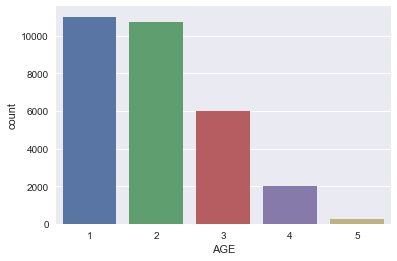

In [18]:
data["AGE"] = data["AGE"].replace(6,5)
data["AGE"].value_counts()
sns.countplot(data["AGE"])

In [19]:
age = group_per(data,"AGE","default")
age["Describe"]=["20~30","30~40","40~50","50~60","60~"]
age.sort_values(by="Per")

default,0,1,Sum,Per,Describe
AGE,,,,,
2,8524,2189,10713,0.204331,30~40
1,8542,2471,11013,0.224371,20~30
3,4606,1399,6005,0.232973,40~50
4,1493,504,1997,0.252379,50~60
5,199,73,272,0.268382,60~


## 發現 :
* 借款人的年齡分布高峰是在20~30歲 隨著年齡越大開始遞減
* 40歲開始年紀越大有越容易defult的趨勢


## 對信用額度做一些觀察

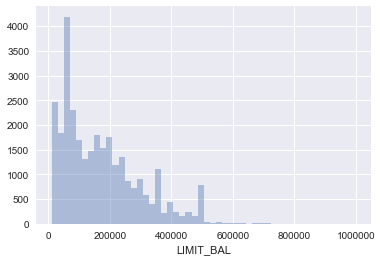

In [20]:
sns.distplot(data["LIMIT_BAL"],kde=False)
sns.set(font_scale=1.2)

In [21]:
data['limit_bal_lavel'] = pd.qcut(data["LIMIT_BAL"], 10,labels=[1,2,3,4,5,6,7,8,9,10])

limit = group_per(data,'limit_bal_lavel',"default")
limit["Range"]=["(9999.999, 30000.0]", "(30000.0, 50000.0]","(50000.0, 70000.0]", 
                "(70000.0, 100000.0]","(100000.0, 140000.0]",
                 "(140000.0, 180000.0]", "(180000.0, 210000.0]",
                "(210000.0, 270000.0]", "(270000.0, 360000.0]","(360000.0, 1000000.0]" ]
limit.sort_values(by="Per")


default,0,1,Sum,Per,Range
limit_bal_lavel,,,,,
10,2182,294,2476,0.118740,"(360000.0, 1000000.0]"
9,2954,528,3482,0.151637,"(270000.0, 360000.0]"
8,2456,478,2934,0.162918,"(210000.0, 270000.0]"
6,2753,578,3331,0.173521,"(140000.0, 180000.0]"
7,2051,436,2487,0.175312,"(180000.0, 210000.0]"
5,2154,638,2792,0.228510,"(100000.0, 140000.0]"
4,2465,801,3266,0.245254,"(70000.0, 100000.0]"
2,2618,977,3595,0.271766,"(30000.0, 50000.0]"
3,1113,443,1556,0.284704,"(50000.0, 70000.0]"


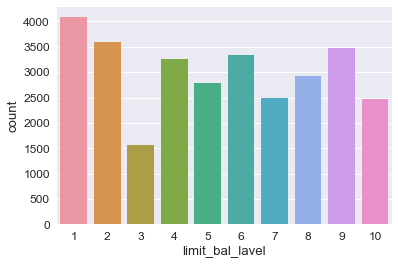

In [22]:
sns.countplot(data['limit_bal_lavel'])

## 發現 :
* 大部分的借款人之信用額度集中在20萬以下
* 大致上信用額度越高的人越不容易發生default


## 對PAY_ 系列做一些觀察

In [23]:
data["PAY_0"].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

## PAY_系列dataset來源沒有解釋得很清楚,經由一些網友寄email詢問作者的回覆以及自己研究了一下我個人理解裡面的值代表該月份的償還狀況 :
* -2 : 到該月為止帳戶沒有消費紀錄,可以理解成卡片在該月份沒有在使用
* -1 : 代表該帳戶當月的費用當月就結清,沒有未繳的款項
*  0 : 代表該帳戶當月帳款只有付最低應繳款,其餘未繳款併入下個月做循環利息,但有繳足最低應付款項不算違約
*  1 : 代表此帳戶截至該月份已經拖欠繳款(未繳足最低應付款)達1個月
*  2 : 代表此帳戶截至該月份已經拖欠繳款(未繳足最低應付款)達2個月
*  依此類推

## 因此default應該是指違約(未繳足最低應繳款)的事件

In [24]:
group_per(data,"PAY_0","default").sort_values(by = "Per")

default,0,1,Sum,Per
PAY_0,,,,
0,12849,1888,14737,0.128113
-2,2394,365,2759,0.132294
-1,4732,954,5686,0.167781
1,2436,1252,3688,0.339479
5,13,13,26,0.500000
6,5,6,11,0.545455
8,8,11,19,0.578947
4,24,52,76,0.684211
2,823,1844,2667,0.691414


In [25]:
group_per(data,"PAY_2","default").sort_values(by = "Per")

default,0,1,Sum,Per
PAY_2,,,,
0,13227.0,2503.0,15730.0,0.159123
-1,5084.0,966.0,6050.0,0.159669
1,23.0,5.0,28.0,0.178571
-2,3091.0,691.0,3782.0,0.182708
4,49.0,50.0,99.0,0.505051
2,1743.0,2184.0,3927.0,0.556150
5,10.0,15.0,25.0,0.600000
7,8.0,12.0,20.0,0.600000
3,125.0,201.0,326.0,0.616564


In [26]:
group_per(data,"PAY_3","default").sort_values(by = "Per")

default,0,1,Sum,Per
PAY_3,,,,
-1,5012,926,5938,0.155945
0,13013,2751,15764,0.174512
-2,3328,757,4085,0.185312
1,3,1,4,0.250000
2,1850,1969,3819,0.515580
5,9,12,21,0.571429
3,102,138,240,0.575000
4,32,44,76,0.578947
6,9,14,23,0.608696


In [27]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'marriage', 'education', 'limit_bal_lavel'],
      dtype='object')

## 發現 :
* 發現不管在過去的哪個月分,只要有出現違約達5個月以上,幾乎要繼續違約的機率非常高

##  對BILL_AMT系列作觀察


In [28]:
data["BILL_AMT1"].describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

## 大部分的帳單都集中在10萬元以下
## 問題:
* 為何會有負的值?

# 對PAY_AMT , BILL_AMT系列一起觀察

In [29]:
data["PAY_AMT1"].describe()

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64

In [30]:
data["PAY_AMT2"].describe()

count    3.000000e+04
mean     5.921163e+03
std      2.304087e+04
min      0.000000e+00
25%      8.330000e+02
50%      2.009000e+03
75%      5.000000e+03
max      1.684259e+06
Name: PAY_AMT2, dtype: float64

## 大部分的付款都集中在1萬元以下


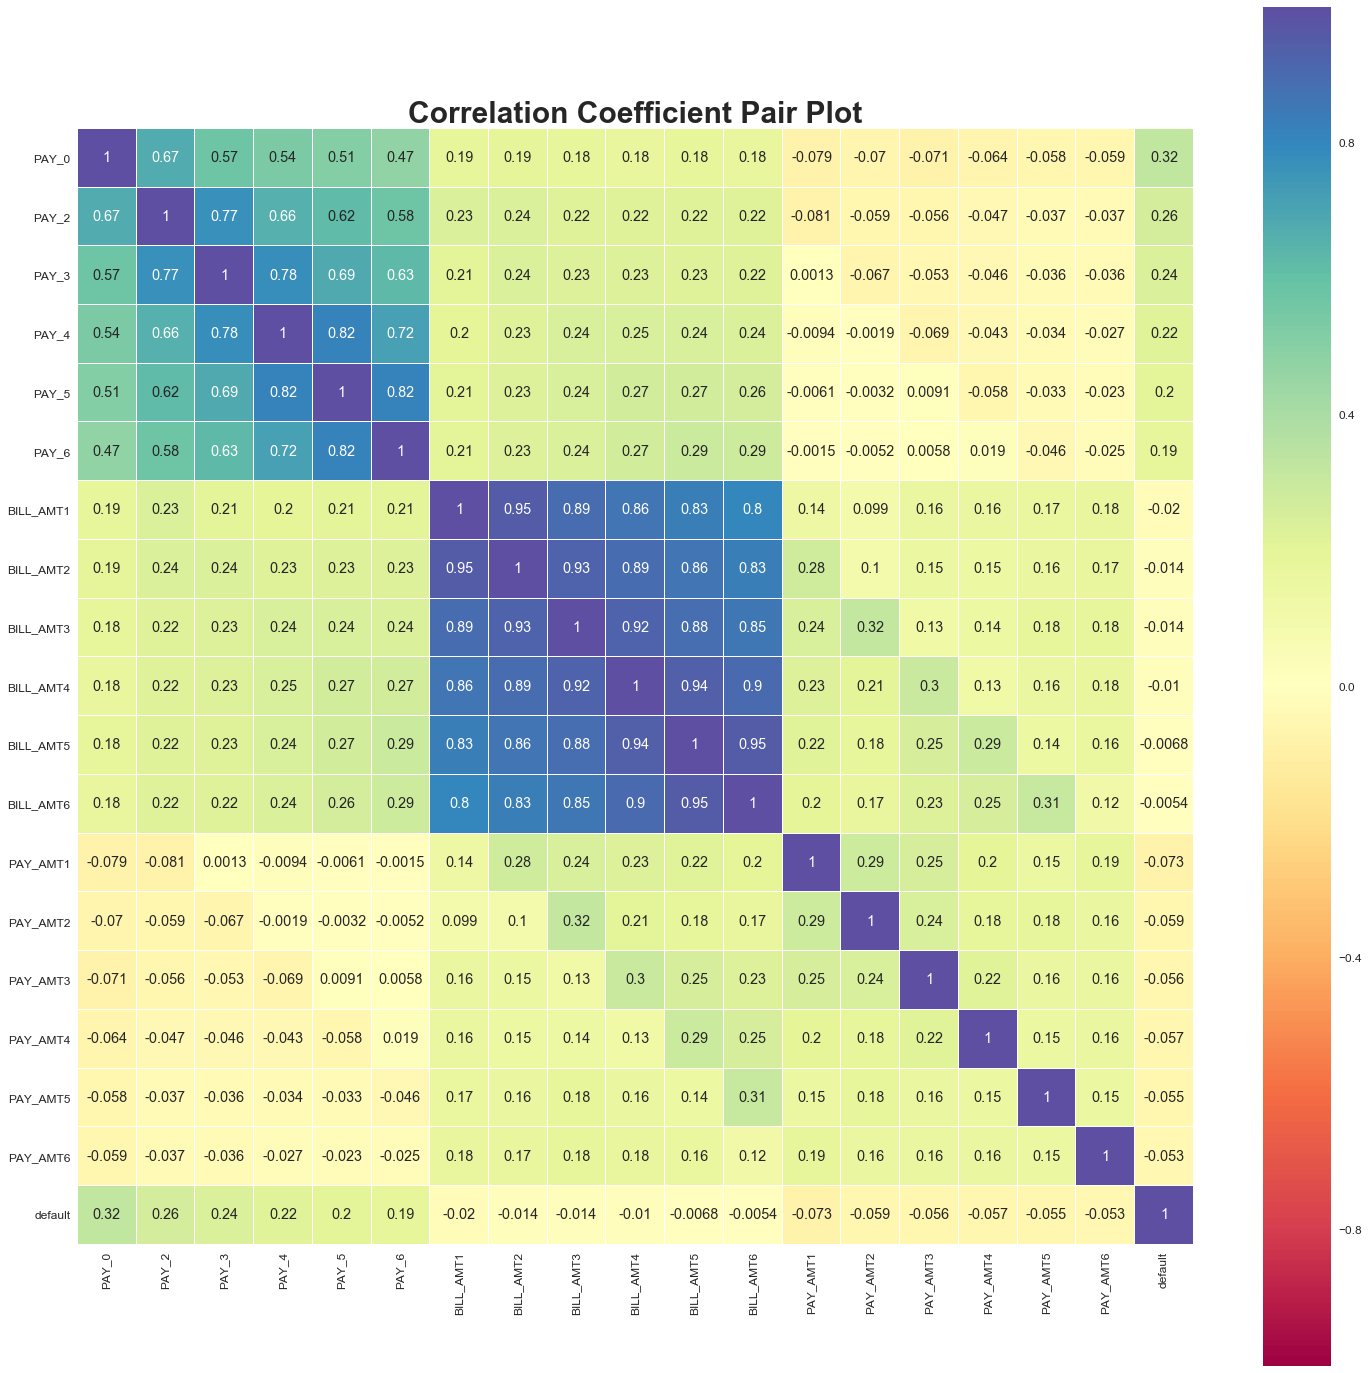

In [31]:
plt.figure(figsize=(25,25))
ax = plt.axes()
corr =data[['PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',"default"]].corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Correlation Coefficient Pair Plot',fontweight="bold", size=30)
plt.show()

## 發現:
* PAY_AMT與BILL_AMT相差一期有較大的正相關 , 也許是許多人都只繳最低應付款,所以這期沒繳完累積到下期,使下期的最低應付款增加

* 另外付款狀況PAY_系列也跟BILL_AMT系列有較大的正相關 , 也就是說我某一期累積要付的金額越高 , 違約的期數也可能越高

* BILL_AMT之間高度正相關 , 也就是說這個變數應該是代表總欠款,這期沒繳完的會延續到後期

# 硬TRAIN一發
### 簡單資料清理後先隨意TRAIN一下看看效果
### Random Forest

In [32]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'marriage', 'education', 'limit_bal_lavel'],
      dtype='object')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import f1_score
data_clean1 = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']]

In [34]:
## 分出data跟label
x_data_clean1 = data_clean1[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',]]
y_data_clean1 = data_clean1[ 'default']

x_train1,x_test1,y_train1,y_test1 = train_test_split(x_data_clean1,y_data_clean1,test_size = 0.3)

In [35]:
forest = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 
forest.fit(x_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [36]:
y_predict1 = forest.predict(x_test1)
accuracy_score (y_true=y_test1,y_pred=y_predict1)

0.81544444444444442

### 定義一些函數來檢測模型預測結果

In [37]:
def score_matrix ( true , pred) :
    TP = np.sum(np.logical_and(pred==1,true==1))
    TN = np.sum(np.logical_and(pred==0,true==0))
    FP = np.sum(np.logical_and(pred==1,true==0))
    FN = np.sum(np.logical_and(pred==0,true==1))
    #判斷為真且為真的機率
    Precision = TP/(TP+FP)
    #為真被判斷為真的機率
    Recall = TP/(TP+FN)
    #為假被判斷為真的機率
    FPR = FP/(TN+FP)
    #平測不平衡資料的指標
    F1 = f1_score(y_true = true,y_pred=pred)
    ACC = accuracy_score (y_true=true,y_pred=pred)
    
    score = pd.DataFrame({"Index":["Precision","Recall","FPR","Accuracy","F1"],
                          "Score":[Precision,Recall,FPR,ACC, F1]})
    return score

In [38]:
def features_important(model,train_data):
    feature = pd.DataFrame(model.feature_importances_.reshape(len(train_data.columns),1),index=train_data.columns,columns=["Importance"])
    return feature.sort_values(by="Importance",ascending= False)

In [39]:
score_matrix(y_test1,y_predict1)

,Index,Score
0,Precision,0.645592
1,Recall,0.364688
2,FPR,0.056760
3,Accuracy,0.815444
4,F1,0.466088


In [40]:
features_important(forest,x_train1)

,Importance
PAY_0,0.246971
LIMIT_BAL,0.210508
PAY_2,0.118751
PAY_3,0.073457
AGE,0.064984
PAY_4,0.064728
PAY_5,0.057708
PAY_6,0.056684
EDUCATION,0.051474
MARRIAGE,0.031735


## 發現 :
* PAY_0 在預測上有不錯的解釋力
* 雖然模型在testing上準確率達0.814 , 但recall(testing中資料為1被正確預測出來的機率)
  只有0.358 , precision(預測1正確的機率)只有0.6632 
* 問題的原因在於資料集為不平衡資料集

## 改善 :
* 從演算法下手 :  嘗試不同的對付不平衡資料的Model
* 從資料下手   :  upsampling , downsampling

# 選定模型 :
* Random Forest
* XGboost Classifier
* SVM
* fully connected neural network

# 選定抽樣方法 :
* Downsampled 


# 建模前先來做特徵工程

In [41]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,marriage,education,limit_bal_lavel
0,1,20000.0,0,2,1,1,2,2,-1,-1,...,0.0,689.0,0.0,0.0,0.0,0.0,1,marriged,University,1
1,2,120000.0,0,2,2,1,-1,2,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,single,University,5
2,3,90000.0,0,2,2,2,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,single,University,4
3,4,50000.0,0,2,1,2,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,marriged,University,2
4,5,50000.0,1,2,1,4,-1,0,-1,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,marriged,University,2


## 先處理看似重要性較高的PAY_系列
* 將-2,-1併入0表示當月無欠款
* 將2,3併入1表示小拖延(3個月以內)
* 將4,5,6,7,8改為2表示嚴重拖延(4~8個月)



In [42]:
data.loc[:,"pay_0"]=data.loc[:,"PAY_0"].replace([-2,-1,0,1,2,3,4,5,6,7,8],
                                                [0,0,0,0,1,1,2,2,2,2,2])
data.loc[:,"pay_1"]=data.loc[:,"PAY_2"].replace([-2,-1,0,1,2,3,4,5,6,7,8],
                                                [0,0,0,0,1,1,2,2,2,2,2])
data.loc[:,"pay_2"]=data.loc[:,"PAY_3"].replace([-2,-1,0,1,2,3,4,5,6,7,8],
                                                [0,0,0,0,1,1,2,2,2,2,2])
data.loc[:,"pay_3"]=data.loc[:,"PAY_4"].replace([-2,-1,0,1,2,3,4,5,6,7,8],
                                                [0,0,0,0,1,1,2,2,2,2,2])
data.loc[:,"pay_4"]=data.loc[:,"PAY_5"].replace([-2,-1,0,1,2,3,4,5,6,7,8],
                                                [0,0,0,0,1,1,2,2,2,2,2])
data.loc[:,"pay_5"]=data.loc[:,"PAY_6"].replace([-2,-1,0,1,2,3,4,5,6,7,8],
                                                [0,0,0,0,1,1,2,2,2,2,2])

In [43]:
group_per(data,"pay_2","default")

default,0,1,Sum,Per
pay_2,,,,
0,21356,4435,25791,0.171959
1,1952,2107,4059,0.519093
2,56,94,150,0.626667


In [44]:
group_per(data,"pay_0","default")

default,0,1,Sum,Per
pay_0,,,,
0,22411,4459,26870,0.165947
1,901,2088,2989,0.698561
2,52,89,141,0.631206


## 看起來有不錯的區隔能力

## 再來處理BILL_AMT系列
* 由前面得知 , BILL_AMT系列應該是累積的,所以這邊我只想看BILL_AMT1,其他BILL_AMT2~6都DROP掉
* 將BILL_AMT1/信用額度  表示依這個人下期的欠款站信用額度的比例
* 標準化

In [46]:
data["bill_per"] = data["BILL_AMT1"]/data["LIMIT_BAL"]
data['bill_std'] = data["BILL_AMT1"]/(np.std(data["BILL_AMT1"]))

## 再來處理PAY_AMT系列
* 一樣只看前ㄧ期PAY_AMT1
* 將BILL_AMT不為0 , 但PAY_AMT為零特別容易違約的人抓出來 設為2
* 將BILL_AMT不為0 , 但PAY_AMT也不為零稍微容易違約的人抓出來 設為1
* 將BILL_AMT為0,最不容易違約的人設為0

In [47]:
a = (data.BILL_AMT1 >0 ) & (data.PAY_AMT1<=0)
c = (data.BILL_AMT1 >0 ) & (data.PAY_AMT1>0)
b = (data.BILL_AMT1 <=0) 

In [48]:
data.loc[a,"pay_sci"] = 2
data.loc[b,"pay_sci"] = 0
data.loc[c,"pay_sci"] = 1


In [49]:
data.loc[a,"default"].value_counts()

0    2105
1    1390
Name: default, dtype: int64

In [50]:
data.loc[b,"default"].value_counts()

0    1955
1     643
Name: default, dtype: int64

In [51]:
group_per(data,"pay_sci","default")

default,0,1,Sum,Per
pay_sci,,,,
0.0,1955,643,2598,0.247498
1.0,19304,4603,23907,0.192538
2.0,2105,1390,3495,0.397711


## 看起來區隔能力不錯
* 2分類沒問題 不過很怪的是BILL_AMT<=0 違約率比BILL_AMT>0還高

In [52]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'marriage', 'education', 'limit_bal_lavel', 'pay_0', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'bill_per', 'bill_std', 'pay_sci'],
      dtype='object')

In [162]:
data_clean1 = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_0',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5','bill_per' , 'default','bill_std','pay_sci']]

x_data_clean1 = data_clean1[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_0',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5','bill_per' ,'bill_std','pay_sci']]
y_data_clean1 = data_clean1[ 'default']

x_train1,x_test1,y_train1,y_test1 = train_test_split(x_data_clean1,y_data_clean1,test_size = 0.3)

In [160]:
x_train1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_0', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'bill_per', 'bill_std', 'pay_sci'],
      dtype='object')

## 開好模型

In [67]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
#import神經網路
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

forest = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 
forest.fit(x_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [68]:
#開好隨機森崊
model_list = [ RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1),
#開好XGBClassifier
XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=10),

#開好svc
SVC()]




## 在普通train set上訓練

In [180]:

#def model_compet (true) :
score = pd.DataFrame(columns=["Precision","Recall","FPR","ACC","F1"],
                         index =[0,1,2])
i=0
for clf in model_list:
    model = clf.__class__.__name__
    clf.fit(x_train1,y_train1)
    pred = clf.predict(x_test1)
    TP = np.sum(np.logical_and(pred==1,y_test1==1))
    TN = np.sum(np.logical_and(pred==0,y_test1==0))
    FP = np.sum(np.logical_and(pred==1,y_test1==0))
    FN = np.sum(np.logical_and(pred==0,y_test1==1))
    #判斷為真且為真的機率
    Precision = TP/(TP+FP)
    #為真被判斷為真的機率
    Recall = TP/(TP+FN)
    #為假被判斷為真的機率
    FPR = FP/(TN+FP)
    #平測不平衡資料的指標
    F1 = f1_score(y_true = y_test1,y_pred=pred)
    ACC = accuracy_score (y_true=y_test1,y_pred=pred)
    score.loc[i] = pd.Series({"Precision":Precision
                                      ,"Recall":Recall,"FPR":FPR,
                                      "ACC":ACC,"F1":F1})   
    i=i+1
   

In [181]:
score.index=["RandomForest","XGBoost","SVM"]
score

,Precision,Recall,FPR,ACC,F1
RandomForest,0.66451,0.355589,0.0520206,0.814889,0.463273
XGBoost,0.685801,0.336795,0.044712,0.816333,0.451741
SVM,0.702806,0.272502,0.0333907,0.810667,0.39273


## 在downsampled上訓練

In [182]:
from sklearn.utils import resample
train_set = x_train1.join(y_train1)
train_set["default"].value_counts()

0    16386
1     4614
Name: default, dtype: int64

In [183]:
## 把0的資料在訓練集上resameple降低到與1的資料相同數目
major = train_set[train_set["default"]==0]
minor = train_set[train_set["default"]==1]
major_down = resample(major,replace=True,n_samples=4603,random_state=66)
down_sample = pd.concat([minor,major_down])
down_sample["default"].value_counts()

1    4614
0    4603
Name: default, dtype: int64

In [184]:
x_down = down_sample[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_0',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5','bill_per' ,'bill_std','pay_sci']]
y_down = down_sample["default"]

### 開始訓練


In [185]:
score_down = pd.DataFrame(columns=["Precision","Recall","FPR","ACC","F1"],
                         index =[0,1,2])
j=0
for clf in model_list:
    model = clf.__class__.__name__
    clf.fit(x_down,y_down)
    pred = clf.predict(x_test1)
    TP = np.sum(np.logical_and(pred==1,y_test1==1))
    TN = np.sum(np.logical_and(pred==0,y_test1==0))
    FP = np.sum(np.logical_and(pred==1,y_test1==0))
    FN = np.sum(np.logical_and(pred==0,y_test1==1))
    #判斷為真且為真的機率
    Precision = TP/(TP+FP)
    #為真被判斷為真的機率
    Recall = TP/(TP+FN)
    #為假被判斷為真的機率
    FPR = FP/(TN+FP)
    #平測不平衡資料的指標
    F1 = f1_score(y_true = y_test1,y_pred=pred)
    ACC = accuracy_score (y_true=y_test1,y_pred=pred)
    score_down.loc[j] = pd.Series({"Precision":Precision
                                      ,"Recall":Recall,"FPR":FPR,
                                      "ACC":ACC,"F1":F1})   
    j=j+1
   

In [186]:
score_down.index=["RandomForest","XGBoost","SVM"]
score_down

,Precision,Recall,FPR,ACC,F1
RandomForest,0.401065,0.670623,0.290198,0.701,0.501943
XGBoost,0.545937,0.508408,0.122528,0.794556,0.526504
SVM,0.451836,0.51731,0.181857,0.750556,0.482361


# 結論 :
* 在判斷客戶時可參考前半段的資料觀察,可大概知道那些族群有較高的可能性會違約
* 對於銀行而言真正關心的應該是如何有效率識別出會default的客戶也就是precision要夠準,在這個考量下使用xgboost可能是較好的選擇
* xgboost 和 randomforest 對於不平衡資料較能提高recall , 但也只能到6成多 ,要做到真正預測還需要再研究
